<a href="https://colab.research.google.com/github/dakshayani2906/Data-Science-Portfolio/blob/main/INN_Hotels_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
# Import Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [286]:
# Load the dataset

read = pd.read_csv("INNHotelsGroup.csv")

In [287]:
# Copying data to avoid any changes

df = read.copy()

In [288]:
# Dataset Overview

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [289]:
#Understand shape of dataset

df.shape

(36275, 19)

In [290]:
#Check the datatypes of the columns for the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [291]:
# Statistical summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [292]:
df.describe(include = ["object"]).T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


Exploratory Data Analysis

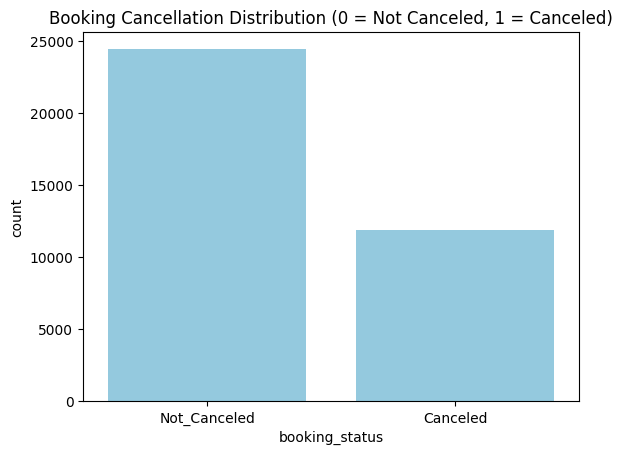

In [293]:
# Plot Target Variable Distribution

sns.countplot(data=df, x='booking_status', color='skyblue')
plt.title("Booking Cancellation Distribution (0 = Not Canceled, 1 = Canceled)")
plt.show()

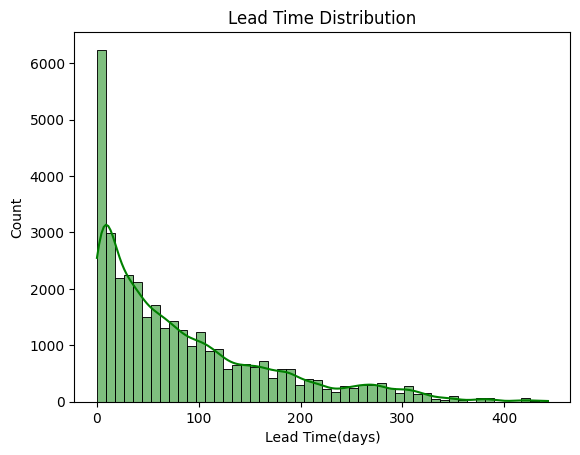

In [294]:
# Lead Time Distribution

sns.histplot(df['lead_time'], bins = 50, color= 'green', kde = True)
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time(days)")
plt.show()

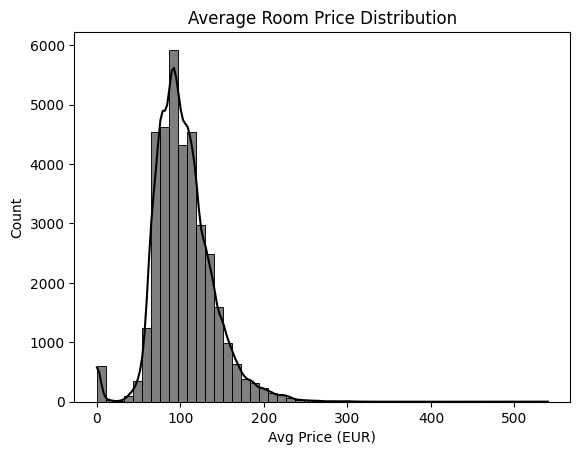

In [295]:
# Average Price per Room
sns.histplot(df['avg_price_per_room'], color = 'black', bins=50, kde=True)
plt.title("Average Room Price Distribution")
plt.xlabel("Avg Price (EUR)")
plt.show()

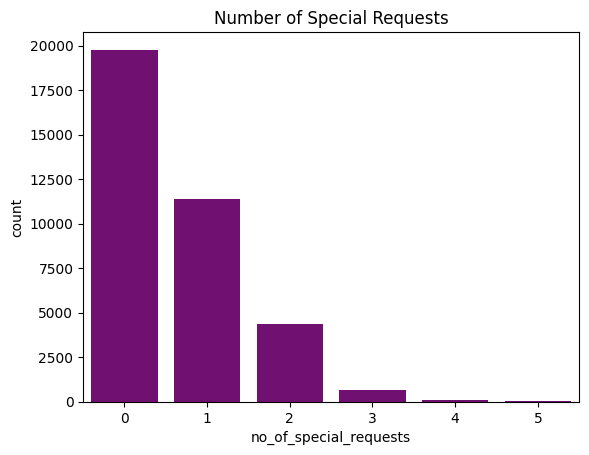

In [296]:
# Special Requests
sns.countplot(x='no_of_special_requests', data=df, color = "purple")
plt.title("Number of Special Requests")
plt.show()

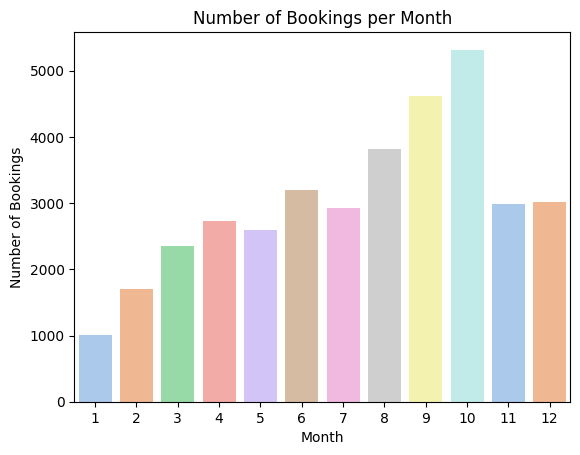

In [297]:
# What are the busiest months in the hotel?
busiest_months = df['arrival_month'].value_counts().sort_index()
sns.barplot(x=busiest_months.index, y=busiest_months.values, palette = "pastel")
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

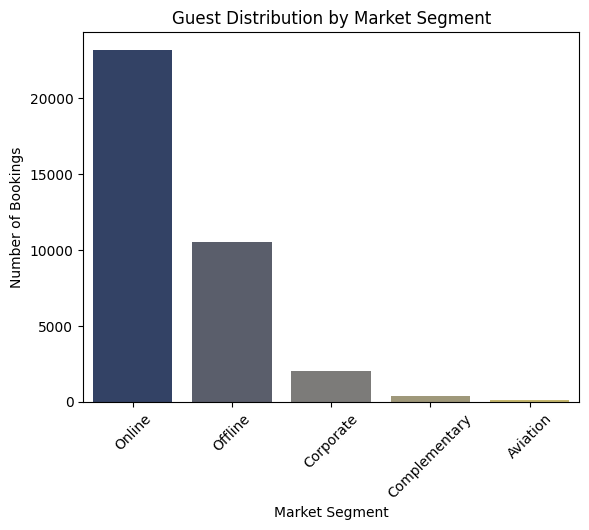

In [298]:
# Which market segment do most of the guests come from?
segment_counts = df['market_segment_type'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='cividis')
plt.title('Guest Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

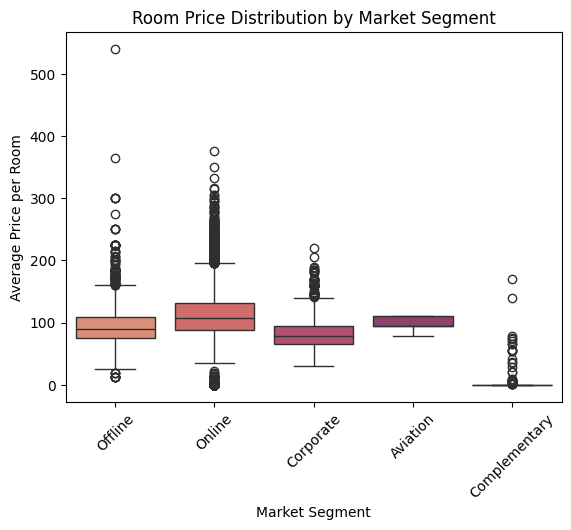

In [299]:
# Room price differences by market segment
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', palette='flare')
plt.title('Room Price Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Price per Room')
plt.xticks(rotation=45)
plt.show()


In [300]:
df['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.672364
Canceled,0.327636


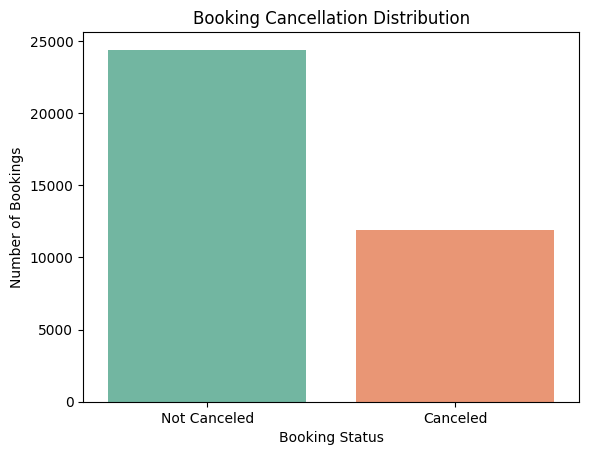

In [301]:
df['booking_status'].value_counts(normalize=True)

sns.countplot(data=df, x='booking_status', palette='Set2')
plt.title("Booking Cancellation Distribution")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.show()

In [302]:
# 5. What percentage of repeating guests cancel?
repeating_guests_df = df.loc[df['repeated_guest'] == 1]
print(f"\nPercentage of repeating guests bookings canceled: ")
repeating_guests_df['booking_status'].value_counts(normalize=True).to_dict().get("Canceled")*100


Percentage of repeating guests bookings canceled: 


1.7204301075268817

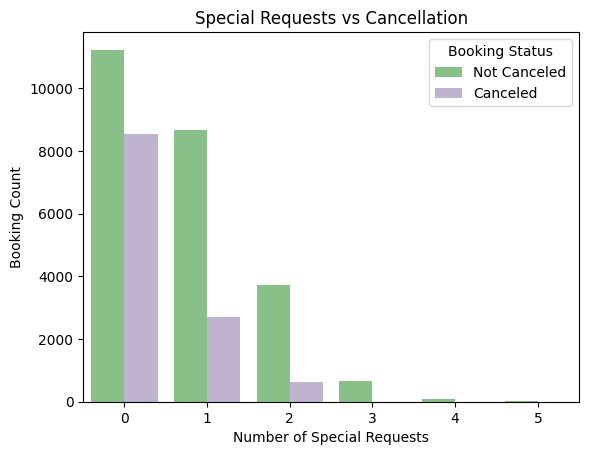

In [303]:
# 6. Do special requests affect cancellation?
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status', palette= 'Accent')
plt.title('Special Requests vs Cancellation')
plt.xlabel('Number of Special Requests')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

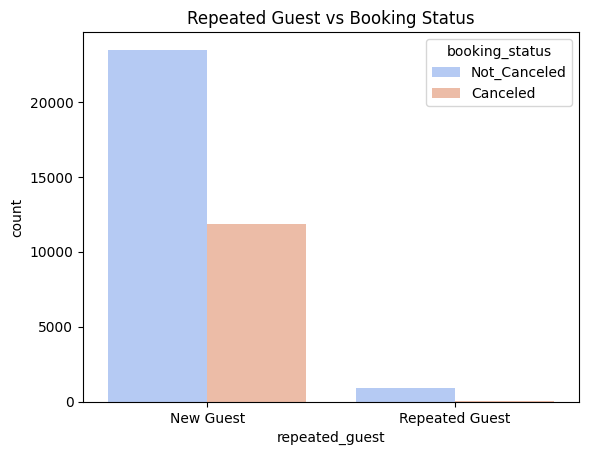

In [304]:
 # Repeated Guest vs Cancellation
sns.countplot(data=df, x='repeated_guest', hue='booking_status', palette= 'coolwarm')
plt.title("Repeated Guest vs Booking Status")
plt.xticks([0, 1], ['New Guest', 'Repeated Guest'])
plt.show()

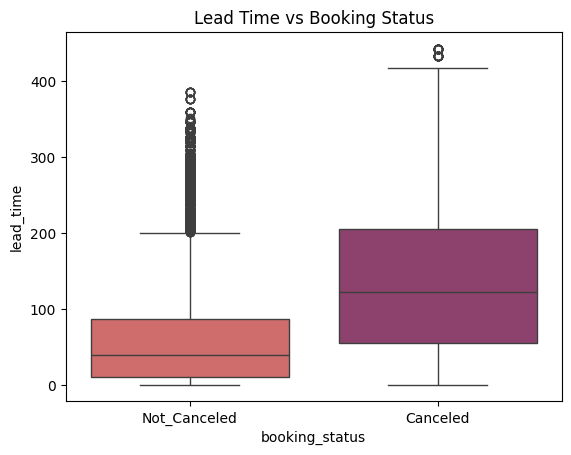

In [305]:

# Lead Time vs Booking Status
sns.boxplot(data=df, x='booking_status', y='lead_time', palette= 'flare')
plt.title("Lead Time vs Booking Status")
plt.show()

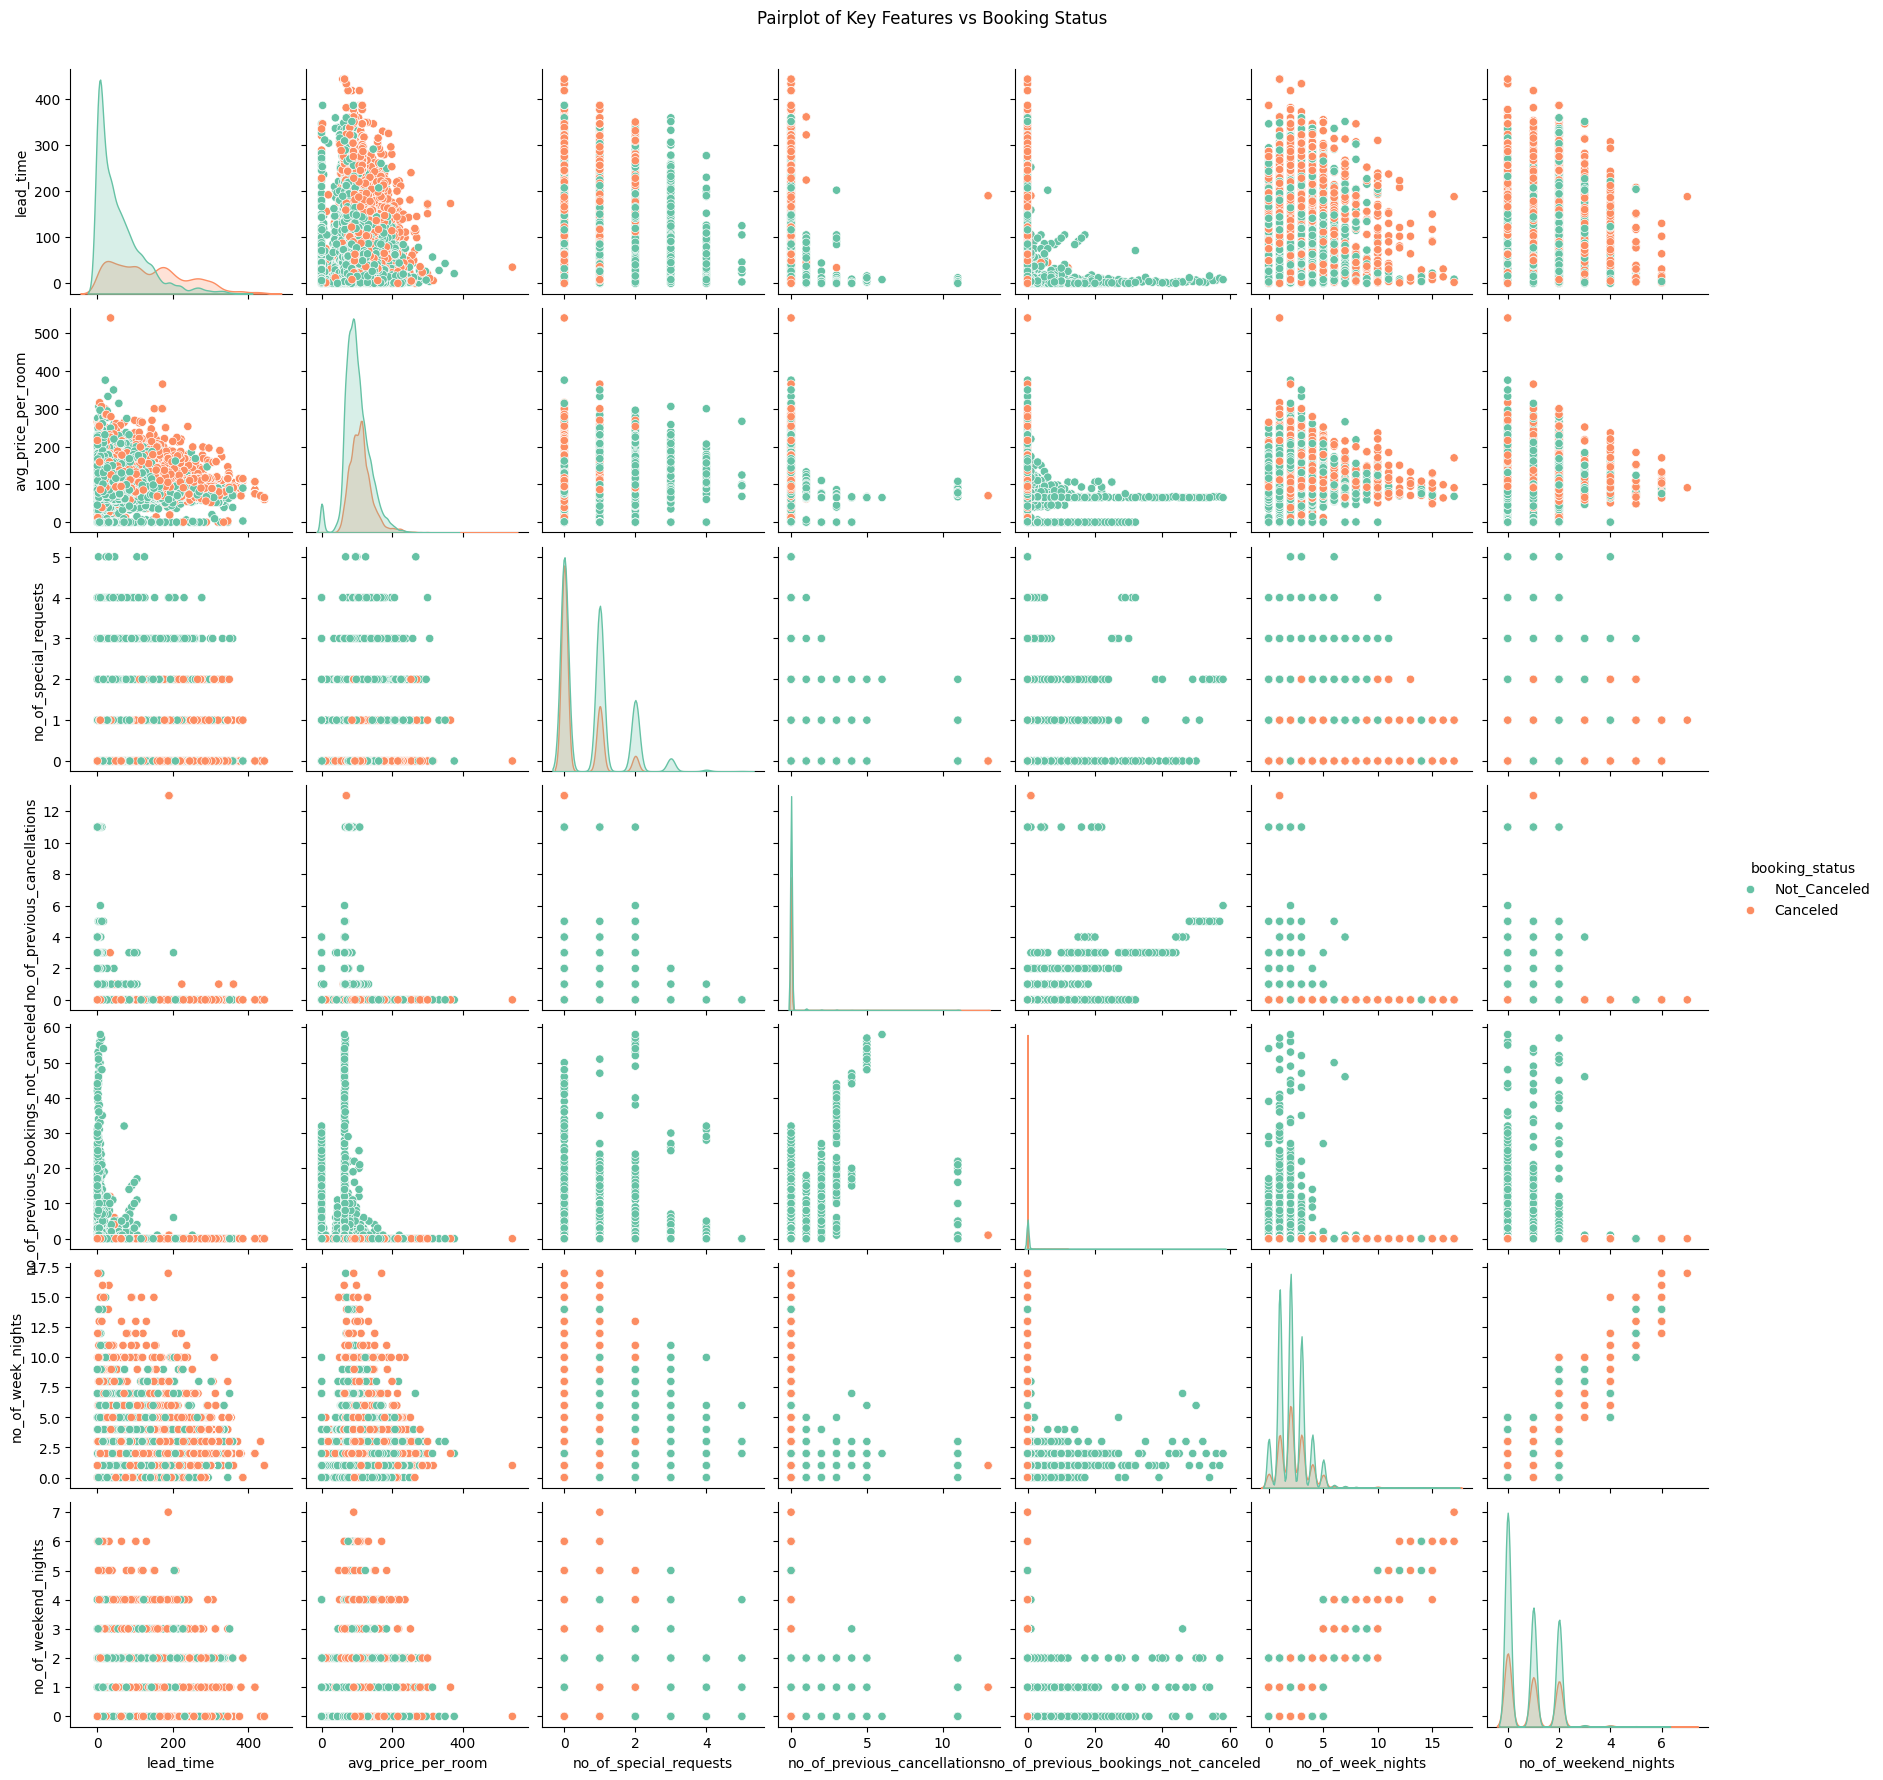

In [306]:
# Select only key numeric features + target
selected_features = [
    'lead_time',
    'avg_price_per_room',
    'no_of_special_requests',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_week_nights',
    'no_of_weekend_nights',
    'booking_status'
]

# Create a smaller DataFrame
pairplot_df = df[selected_features]

# Plot
sns.pairplot(pairplot_df, hue='booking_status', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot of Key Features vs Booking Status", y=1.02)
plt.show()

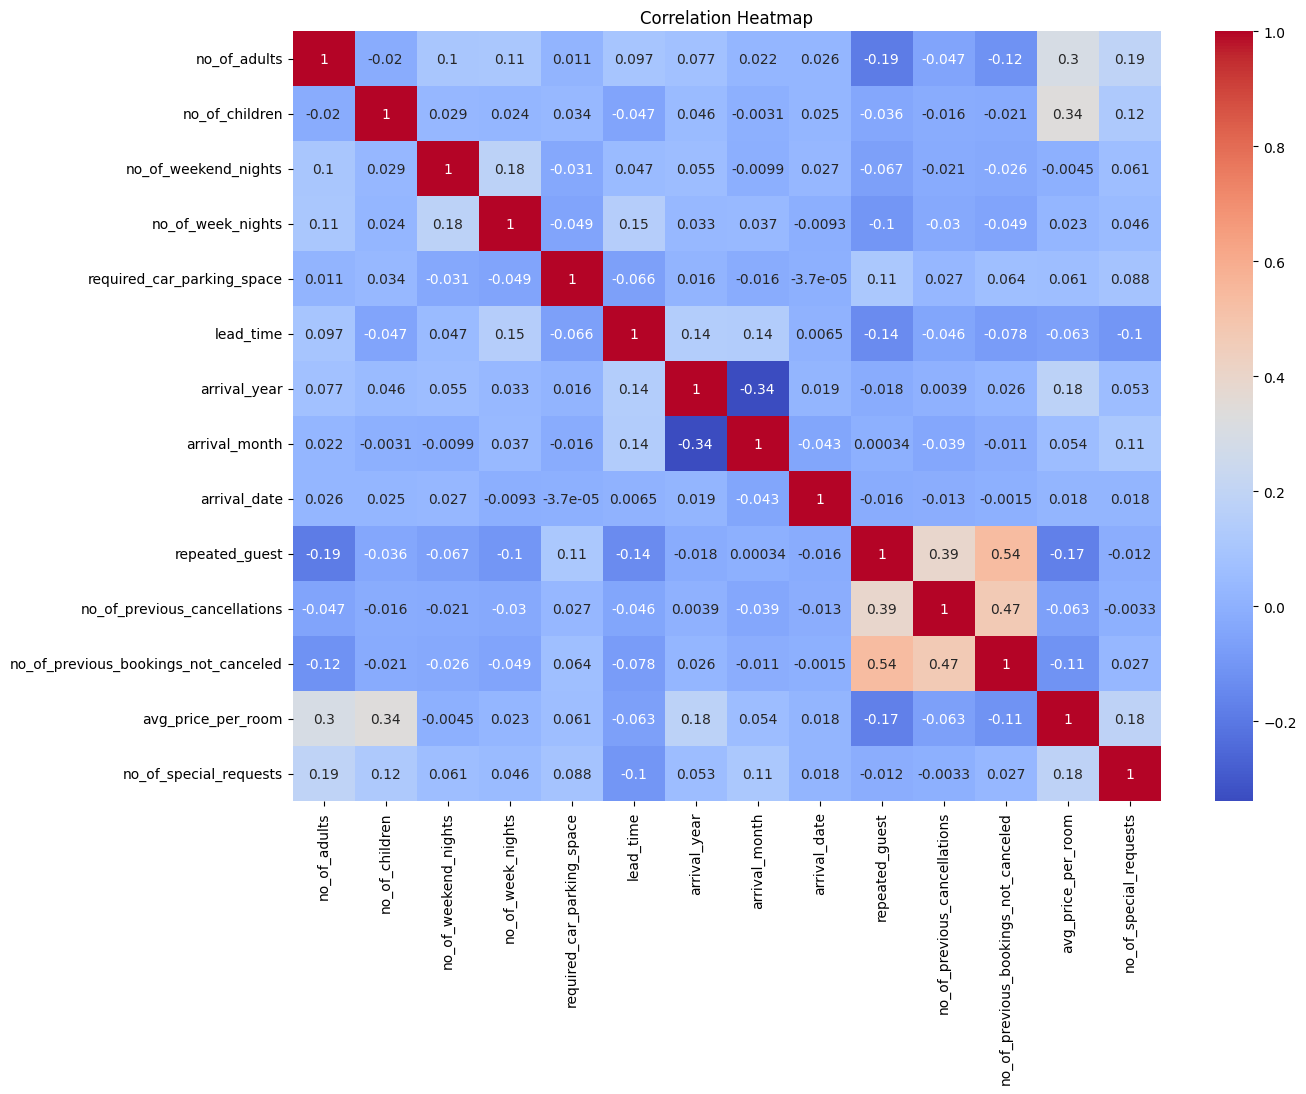

In [307]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

Data Preprocessing

In [308]:
# Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [309]:
# Check missing values
df.isnull().sum()


,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [310]:
# Dropping Booking ID

df.drop(["Booking_ID"], axis = 1, inplace = True)

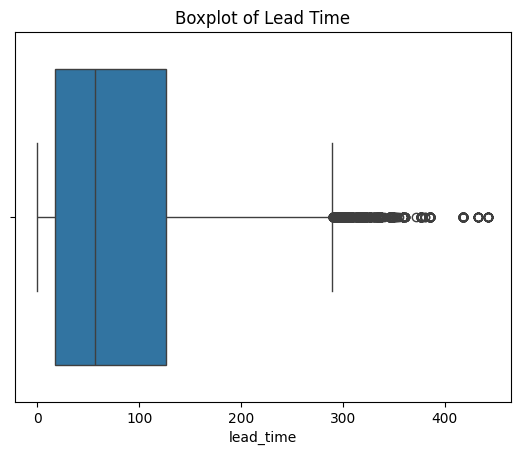

In [311]:
# Detect outliers in lead_time
sns.boxplot(x=df['lead_time'])
plt.title("Boxplot of Lead Time")
plt.show()


In [312]:
# Remove extreme outliers in lead_time
q_high = df['lead_time'].quantile(0.99)
df = df[df['lead_time'] <= q_high]

Feature Engineering

In [313]:
# Total nights stayed
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

# Booking month (categorical to seasonal group)
df['season'] = df['arrival_month'].map({
    12:'Winter', 1:'Winter', 2:'Winter',
    3:'Spring', 4:'Spring', 5:'Spring',
    6:'Summer', 7:'Summer', 8:'Summer',
    9:'Fall', 10:'Fall', 11:'Fall'
})

In [314]:
# Encode binary categorical
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
df['repeated_guest'] = df['repeated_guest'].astype(int)

# One-hot encode remaining categoricals
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'season']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Drop ID columns (non-informative)
df = df.drop(columns=['Booking_ID'], errors='ignore')

In [315]:
# Identify numerical columns to scale
num_cols = ['lead_time', 'avg_price_per_room', 'total_nights', 'no_of_previous_bookings_not_canceled']

# Initialize and apply scaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [316]:

# Split features and target
X = df.drop(columns=['booking_status'])
y = df['booking_status']

# Split into 80-20 train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (28778, 31), Test shape: (7195, 31)


In [317]:


import statsmodels.api as sm


# Ensure all data is numeric
X_train_sm = sm.add_constant(X_train).astype(float)
y_train_numeric = y_train.astype(float)

# Fit logistic regression model
logit_model = sm.Logit(y_train_numeric, X_train_sm)
result = logit_model.fit()

# Summary
print(result.summary())

# Prepare X_test
X_test_sm = sm.add_constant(X_test).astype(float)

# Predict
y_pred_probs = result.predict(X_test_sm)
y_pred_lr = (y_pred_probs > 0.5).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))

         Current function value: 0.420018
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28778
Model:                          Logit   Df Residuals:                    28747
Method:                           MLE   Df Model:                           30
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                  0.3322
Time:                        10:44:19   Log-Likelihood:                -12087.
converged:                      False   LL-Null:                       -18101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -465.1996        nan        nan        nan         nan

In [318]:
# Train model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_pred_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs_dt))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4872
           1       0.76      0.70      0.73      2323

    accuracy                           0.83      7195
   macro avg       0.81      0.80      0.80      7195
weighted avg       0.83      0.83      0.83      7195

Confusion Matrix:
 [[4368  504]
 [ 700 1623]]
ROC-AUC: 0.8821358857346433


Model Performance Improvement

In [319]:
# Check Mutlicollinearity using VIF

# Calculate VIF
X_vif = sm.add_constant(X_train).astype(float)
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_df.sort_values(by="VIF", ascending=False))

                                 Feature        VIF
3                   no_of_weekend_nights        inf
4                      no_of_week_nights        inf
15                          total_nights        inf
28            market_segment_type_Online  67.408991
27           market_segment_type_Offline  60.678246
26         market_segment_type_Corporate  15.934247
25     market_segment_type_Complementary   4.322156
29                         season_Spring   2.581797
13                    avg_price_per_room   2.232609
8                          arrival_month   2.176367
2                         no_of_children   2.061468
23        room_type_reserved_Room_Type 6   2.041048
10                        repeated_guest   1.759953
30                         season_Summer   1.723860
12  no_of_previous_bookings_not_canceled   1.608812
31                         season_Winter   1.607851
7                           arrival_year   1.468661
6                              lead_time   1.434868
21        ro

3 features with inf VIF:

no_of_week_nights

no_of_weekend_nights

total_nights

Several features with VIF > 10, including:

market_segment_type_Online (67)

market_segment_type_Offline (60)

market_segment_type_Corporate (15)

In [320]:
df = df.drop(columns=['no_of_week_nights', 'no_of_weekend_nights', 'market_segment_type_Offline', 'market_segment_type_Online'])

In [321]:
# Recalculate VIF after dropping redundant features
X_vif = sm.add_constant(df.drop(columns='booking_status')).astype(float)
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_df.sort_values(by="VIF", ascending=False))

                                 Feature           VIF
0                                  const  4.011725e+07
25                         season_Spring  2.543682e+00
6                          arrival_month  2.158033e+00
11                    avg_price_per_room  2.157457e+00
2                         no_of_children  2.009676e+00
21        room_type_reserved_Room_Type 6  2.006440e+00
8                         repeated_guest  1.764080e+00
26                         season_Summer  1.709335e+00
10  no_of_previous_bookings_not_canceled  1.619384e+00
27                         season_Winter  1.606216e+00
5                           arrival_year  1.460721e+00
24         market_segment_type_Corporate  1.423699e+00
4                              lead_time  1.402338e+00
9           no_of_previous_cancellations  1.355561e+00
1                           no_of_adults  1.343238e+00
19        room_type_reserved_Room_Type 4  1.335985e+00
23     market_segment_type_Complementary  1.319929e+00
14        

In [322]:
# Remove High p-value Features

#Fit logistic model with all variables
X_train_lr = sm.add_constant(X_train).astype(float)
y_train_lr = y_train.astype(float)
logit_model = sm.Logit(y_train_lr, X_train_lr).fit()

# Check p-values
print(logit_model.summary())

         Current function value: 0.420018
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28778
Model:                          Logit   Df Residuals:                    28747
Method:                           MLE   Df Model:                           30
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                  0.3322
Time:                        10:44:22   Log-Likelihood:                -12087.
converged:                      False   LL-Null:                       -18101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -465.1996        nan        nan        nan         nan

 no_of_week_nights, total_nights, and const have:

nan coefficients and p-values → caused by perfect multicollinearity

Some variables have very high p-values (> 0.05):

const

required_car_parking_space → p = 0.969

arrival_year → p = 0.937

type_of_meal_plan_Meal Plan 2 → p = 0.846

type_of_meal_plan_Meal Plan 3 → p = 0.846

season_Spring, season_Summer, season_Winter → p > 0.05

In [323]:
# Define potentially high p-value columns
high_p_cols = [
    'required_car_parking_space',
    'arrival_year',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Meal Plan 3',
    'season_Spring', 'season_Summer', 'season_Winter'
]

# Filter to drop only columns that exist
cols_to_drop = [col for col in high_p_cols if col in df.columns]
df = df.drop(columns=cols_to_drop)

In [324]:
X = df.drop(columns='booking_status')
y = df['booking_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train_lr = sm.add_constant(X_train).astype(float)
y_train_lr = y_train.astype(float)

logit_model = sm.Logit(y_train_lr, X_train_lr).fit()
print(logit_model.summary())

         Current function value: 0.459454
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28778
Model:                          Logit   Df Residuals:                    28757
Method:                           MLE   Df Model:                           20
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                  0.2695
Time:                        10:44:22   Log-Likelihood:                -13222.
converged:                      False   LL-Null:                       -18101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.3025      0.087     -3.458      0.001      -0.474

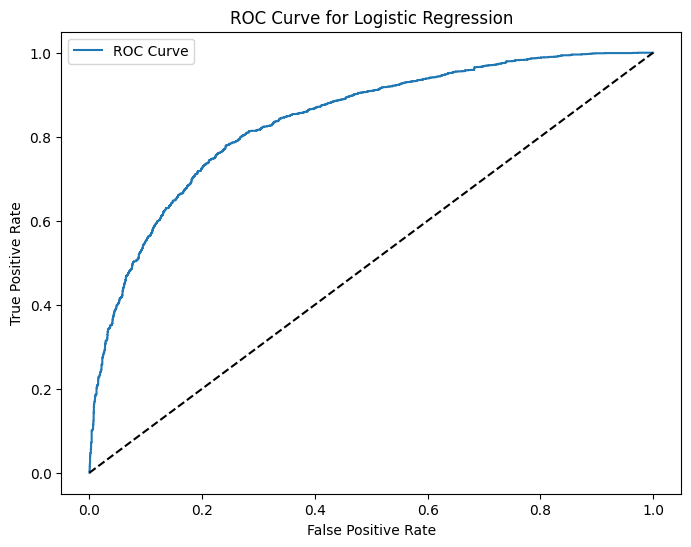

Optimal Threshold: 0.31


In [325]:
# Predict probabilities
X_test_lr = sm.add_constant(X_test).astype(float)
y_probs = logit_model.predict(X_test_lr)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Find best threshold (closest to top-left)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

In [326]:
y_pred_new = (y_probs > optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression After Tuning:")
print(classification_report(y_test, y_pred_new))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))

Logistic Regression After Tuning:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      4872
           1       0.61      0.78      0.68      2323

    accuracy                           0.76      7195
   macro avg       0.74      0.77      0.75      7195
weighted avg       0.79      0.76      0.77      7195

Confusion Matrix:
 [[3693 1179]
 [ 514 1809]]
ROC-AUC: 0.8381868118274667


In [327]:
# Tune Decision Tree (Pre - Pruning)

from sklearn.tree import DecisionTreeClassifier

# Trying different pre-pruning parameters
dt_model_tuned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=50,
    min_samples_leaf=10,
    random_state=42
)

dt_model_tuned.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model_tuned.predict(X_test)
y_pred_probs_dt = dt_model_tuned.predict_proba(X_test)[:, 1]

# Evaluate
print("Decision Tree Tune (Pre - Pruning) :")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs_dt))

Decision Tree Tune (Pre - Pruning) :
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4872
           1       0.78      0.61      0.68      2323

    accuracy                           0.82      7195
   macro avg       0.80      0.76      0.78      7195
weighted avg       0.81      0.82      0.81      7195

Confusion Matrix:
 [[4475  397]
 [ 917 1406]]
ROC-AUC: 0.851288818108626


Logistic Regression improves when:

Multicollinearity is reduced

High p-value features are dropped

Optimal threshold is used

Decision Tree improves with:

Controlled depth

Minimum samples per split